<a href="https://colab.research.google.com/github/kikiru328/CAKD3-Github/blob/main/Python_NLP_%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC_%ED%99%9C%EC%9A%A9_1105_%EB%AC%B8%EC%A0%9C_%EA%B4%91%ED%9B%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 빅데이터 기반 AI 응용 솔루션 개발자 전문 과정

#### 교과목명: Python NLP 라이브러리 활용
- 평가일: 21. 11. 5
- 성명:
- 점수:

[작업형] Q1 ~ Q3 문제당 20점 합계 60점

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Q1. 사람이 문장을 읽는 것처럼 이전에 나온 것을 기억하면서 단어별로 또는 한눈에 들어오는 만큼씩 처리하여 문장에 있은 의미를 자연스럽게 표현하려는 목적으로 과거 정보를 사용하고 새롭게 얻은 정보를 계속 업데이트하는 방식이 순환 신경망(RNN) 이다. SimpleRNN을 활용하여 IMDB 영화 리뷰 데이터에 대하여 아래 사항을 수행하세요.
- 데이터 전처리 : max_features 10000, maxlen = 500, batch_size 32
- 케라스를 사용하여 입력 시퀀스에 대한 마지막 출력만 반환하는 방식으로 모델링.(embedding 층 입력 (max_features, 32))
- 학습 및 검증 옵션 : epochs 10, batch_size 128, 검증 데이터 20%
- 훈련과 검증의 손실과 정확도를 그래프로 표현
- 검증 정확도를 확인하고 동 사례에 SimpleRNN 모델의 적합 여부 및 개선 방안에 대하여 기술하세요.

In [ ]:
# RNN 모델
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

model = Sequential()

model.add( Embedding(10000, 32) )
model.add( SimpleRNN(32) )

# Summary
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 데이터 전처리
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
max_len = 500
batch_size = 32

( x_train, y_train ), ( x_test, y_test ) = imdb.load_data(num_words = max_features)

x_trian = sequence.pad_sequences( x_train, maxlen = max_len )
x_test = sequence.pad_sequences( x_test, maxlen = max_len )

In [ ]:
from tensorflow.keras.layers import Dense

model = Sequential()
model.add( Embedding( max_features, 32) )
model.add( SimpleRNN (32) )
model.add( Dense( 1, activation = 'sigmoid') )

model.compile( optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'] )

history = model.fit(x_trian, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 19s 116ms/step - loss: 0.5876 - acc: 0.6766 - val_loss: 0.4856 - val_acc: 0.7850
Epoch 2/10
157/157 [==============================] - 18s 117ms/step - loss: 0.3744 - acc: 0.8450 - val_loss: 0.4056 - val_acc: 0.8198
Epoch 3/10
157/157 [==============================] - 18s 116ms/step - loss: 0.2930 - acc: 0.8845 - val_loss: 0.4889 - val_acc: 0.7778
Epoch 4/10
157/157 [==============================] - 18s 116ms/step - loss: 0.2378 - acc: 0.9111 - val_loss: 0.3464 - val_acc: 0.8544
Epoch 5/10
157/157 [==============================] - 18s 117ms/step - loss: 0.1981 - acc: 0.9270 - val_loss: 0.4311 - val_acc: 0.8510
Epoch 6/10
157/157 [==============================] - 19s 119ms/step - loss: 0.1598 - acc: 0.9434 - val_loss: 0.3519 - val_acc: 0.8602
Epoch 7/10
157/157 [==============================] - 19s 119ms/step - loss: 0.1258 - acc: 0.9571 - val_loss: 0.4476 - val_acc: 0.8312
Epoch 8/10
157/157 [==============================] - 1

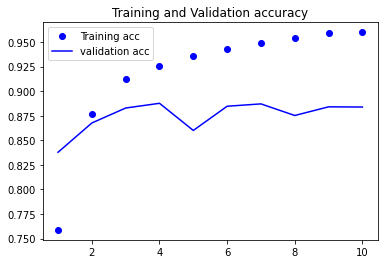

In [73]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

Text(0.5, 1.0, 'Training, validation Loss')

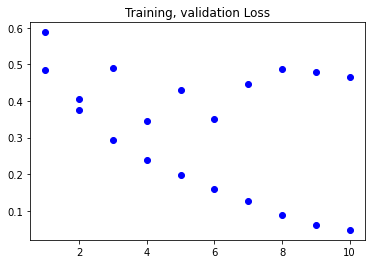

In [ ]:
plt.figure()
plt.plot( epochs, loss, 'bo', label = 'training loss ')
plt.plot( epochs, val_loss, 'bo', label = 'val_loss ')
plt.title ( 'Training, validation Loss')

* 순서대로 500개의 단어만을 사용했기 때문에 성능이 좋자 않다.
* 기존 RNN 보다 얻은 정보가 적기 때문에, 데이터를 많이 주면 할 수 있다.

Q2. Q1 문제를 LSTM 모델을 적용하여 수행하세요
- 모델링, 학습 및 검증
- 결과 시각화

In [59]:
# 데이터 전처리
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
max_len = 500
batch_size = 32

( input_train, y_train ), ( input_test, y_test ) = imdb.load_data(num_words = max_features)

input_train = sequence.pad_sequences( input_train, maxlen = max_len )
input_test = sequence.pad_sequences( input_test, maxlen = max_len )

In [62]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train,y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 37s 227ms/step - loss: 0.5066 - acc: 0.7588 - val_loss: 0.4023 - val_acc: 0.8378
Epoch 2/10
157/157 [==============================] - 36s 227ms/step - loss: 0.3027 - acc: 0.8770 - val_loss: 0.3172 - val_acc: 0.8676
Epoch 3/10
157/157 [==============================] - 36s 227ms/step - loss: 0.2340 - acc: 0.9118 - val_loss: 0.2808 - val_acc: 0.8828
Epoch 4/10
157/157 [==============================] - 36s 228ms/step - loss: 0.2027 - acc: 0.9259 - val_loss: 0.2852 - val_acc: 0.8876
Epoch 5/10
157/157 [==============================] - 36s 230ms/step - loss: 0.1793 - acc: 0.9356 - val_loss: 0.3392 - val_acc: 0.8600
Epoch 6/10
157/157 [==============================] - 36s 231ms/step - loss: 0.1618 - acc: 0.9433 - val_loss: 0.3370 - val_acc: 0.8846
Epoch 7/10
157/157 [==============================] - 37s 239ms/step - loss: 0.1449 - acc: 0.9485 - val_loss: 0.3563 - val_acc: 0.8870
Epoch 8/10
157/157 [==============================] - 3

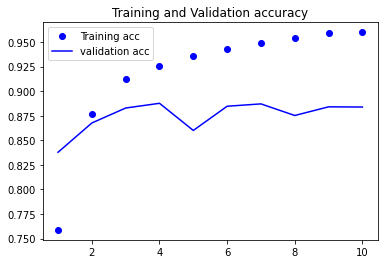

In [70]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

Text(0.5, 1.0, 'Training, validation Loss')

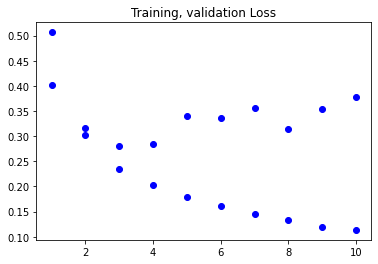

In [71]:
plt.figure()
plt.plot( epochs, loss, 'bo', label = 'training loss ')
plt.plot( epochs, val_loss, 'bo', label = 'val_loss ')
plt.title ( 'Training, validation Loss')

Q3. Huggingface 패키지를 활용하여 BERT pretrained model을 적용한 네이버 영화평가 긍부정 분류 모델을 생성하고 F1 Score로 평가를 수행하세요.

- 네이버 영화평가 데이터 셋 클론닝 방법 :
!git clone https://github.com/e9t/nsmc.git

In [85]:
# !pip install transformers
# !pip install sentencepiece
# !pip install tensorflow_addons

In [95]:
import tensorflow as tf
import numpy as np
import pandas as pd
from transformers import *
import json
from tqdm import tqdm
import os

In [96]:
!git clone https://github.com/e9t/nsmc.git

fatal: destination path 'nsmc' already exists and is not an empty directory.


In [97]:
train = pd.read_table('nsmc/' + 'ratings_train.txt')
test = pd.read_table('nsmc/' + 'ratings_test.txt')

In [98]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

In [99]:
def convert_data(data_df):
  global tokenizer

  SEQ_LEN = 128 # 버트 인풋 길이
  
  tokens, masks, segments, targets = [], [], [], []

  for i in tqdm(range(len(data_df))):
    token = tokenizer.encode(data_df[DATA_COLUMN][i], max_length=SEQ_LEN, truncation=True, padding='max_length')

    num_zeros = token.count(0)
    mask = [1] * (SEQ_LEN-num_zeros) + [0] * num_zeros

    segment = [0] * SEQ_LEN

    tokens.append(token)
    masks.append(mask)
    segments.append(segment)

    targets.append(data_df[LABEL_COLUMN][i])

  tokens = np.array(tokens)
  masks = np.array(masks)
  segments = np.array(segments)
  targets = np.array(targets)
  
  return [ tokens, masks, segments], targets

def load_data(pandas_dataframe):
  data_df = pandas_dataframe
  data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
  data_df[LABEL_COLUMN] = data_df[LABEL_COLUMN].astype(int)
  data_x, data_y = convert_data(data_df)
  return data_x, data_y

In [100]:
SEQ_LEN = 128
BATCH_SIZE = 20

DATA_COLUMN = 'document'
LABEL_COLUMN = 'label'

train_x, train_y = load_data(train)
test_x, test_y = load_data(test)

100%|██████████| 50000/50000 [00:16<00:00, 2963.66it/s]


In [101]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.31.1.74:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.31.1.74:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


In [102]:
import tensorflow_addons as tfa
opt = tfa.optimizers.RectifiedAdam(learning_rate=1.0e-5, weight_decay=0.0025, warmup_proportion=0.05)

In [103]:
def create_sentiment_bert():
  model = TFBertModel.from_pretrained('bert-base-multilingual-cased')
  token_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_word_ids')
  mask_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_masks')
  segment_inputs = tf.keras.layers.Input((SEQ_LEN,),dtype=tf.int32, name='input_segment')
  bert_outputs = model([token_inputs, mask_inputs, segment_inputs])

  bert_outputs = bert_outputs[1]
  sentiment_first = tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.02))(bert_outputs)
  sentiment_model = tf.keras.Model([token_inputs, mask_inputs, segment_inputs], sentiment_first)

  sentiment_model.compile(optimizer = opt, loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
  return sentiment_model

In [ ]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)
with strategy.scope():
    sentiment_model = create_sentiment_bert()
sentiment_model.fit(train_x,train_y,epochs=4,shuffle=True, batch_size=100,validation_data=(test_x,test_y))

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)
Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/4


INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'IteratorGetNext:0' shape=(None, 128) dtype=int64>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 128) dtype=int64>, <tf.Tensor 'IteratorGetNext:2' shape=(None, 128) dtype=int64>, <tf.Tensor 'IteratorGetNext:3' shape=(None,) dtype=int64>]
INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'IteratorGetNext:0' shape=(None, 128) dtype=int64>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 128) dtype=int64>, <tf.Tensor 'IteratorGetNext:2' shape=(None, 128) dtype=int64>, <tf.Tensor 'IteratorGetNext:3' shape=(None,) dtype=int64>]


1500/1500 [==============================] - ETA: 0s - loss: 0.4492 - accuracy: 0.7802

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'IteratorGetNext:0' shape=(None, 128) dtype=int64>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 128) dtype=int64>, <tf.Tensor 'IteratorGetNext:2' shape=(None, 128) dtype=int64>, <tf.Tensor 'IteratorGetNext:3' shape=(None,) dtype=int64>]


1500/1500 [==============================] - 313s 143ms/step - loss: 0.4492 - accuracy: 0.7802 - val_loss: 0.3554 - val_accuracy: 0.8411
Epoch 2/4
1500/1500 [==============================] - 205s 137ms/step - loss: 0.3358 - accuracy: 0.8500 - val_loss: 0.3240 - val_accuracy: 0.8566
Epoch 3/4
 855/1500 [================>.............] - ETA: 1:22 - loss: 0.2955 - accuracy: 0.8701

[단답형] 문제당 4점 합계 40점

다음 질문에 답하시오.
1. “컴퓨터 비전이 픽셀에 적용한 패턴 인식인 것처럼 자연어 처리을 위한 딥러닝은 ( ), ( ), 문단에 적용한 패턴 인식이다.”에서 괄호안에 들어갈 적합한 단어를 기술하세요.

답 : 단어, 문장

2. “딥러닝 모델은 수치형 텐서만 다룰 수 있다. 텍스트를 수치형 텐서로 변환하는 과정을 텍스트 (   )라고 한다.”에서 괄호안에 들어갈 적합한 단어를 기술하세요.

답 : 토큰화

3. “단어와 벡터를 연관 짓는 인기있는 방법은 단어 (   )이라는 밀집 단어 벡터를 사용하는 것이다. 단어 (  )은 원-핫 인코딩으로 얻은 단어 벡터와 달리 데이터로부터 학습되며 더 맣은 정보를 적은 차원에 저장한다. Word2vec 알고리즘은 가장 유명하고 성공적인 단어 (  ) 방법이다.”에서 괄호안에 들어갈 적합한 단어를 기술하세요.

답 : 임베딩 Word_embedding

4. “(   )은 텍스트 전처리 과정에서 분석에 큰 의미가 없는 단어로 문법적인 특성으로 인해 빈번하게 텍스트에 나타나므로 이것들을 사전에 제거하지 않으면 그 빈번함으로 중요한 단어로 인지될 수 있다.”에서 (  )에 들어갈 적합한 단어를 기술하세요

답 : TF-IDF

5. 파이썬의 대표적인 한글 형태소 패키지는 무엇입니까?

답 : KoNLPy

6. “(   )은 음성이나 언어 등 연속적으로 되풀이되는 입력 데이터를 사용하는 모델로서 음성인식, 자연어 처리 등 다양한 분야에서 사용되고 있으며 기본적인 아이디어는 순차적인 정보를 처리한다는데 있다.”에서 괄호안에 적합한 단어를 기술하세요.

답 : RNN 

7. “SimpleRNN은 긴 시간에 걸친 의존성은 학습할 수 없는 문제를 가지고 있는데 층이 많은 일반 네트워크(피트 포원드 네트워크)에서 나타나는 것과 비슷한 현상인 그래디언트 소실문제 때문이다. (    )은 이 문제에 대한 연구의 결정체로서 정보를 여러 타임스텝에 걸처 나르는 방법이 추가됩니다.”에서 괄호안에 들어갈 적합한 단어를 기술하세요.

답 : LSTM

8. “컴퓨터 비젼에서 뛰어난 컨브넷의 특징이 시퀀스 처리와도 깊게 관련되어 있습니다. (    )은 특정 시퀀스 처리 문제에서 RNN과 견줄 만합니다. (    )은 전형적으로 팽창된 커널과 함께 사용됩니다.“에서 괄호안에 들어갈 적합한 단어를 기술하세요.

답 : 1Dconvnet

9. 기존 단방향성 모델은 성능 향상, 문맥 파악에 한계점이 존재했었고, 이를 해결하기 위해 양방향성을 띄는 모델을 제안하는 방향으로 진행되었다. '나는 하늘이 예쁘다고 생각한다'라는 문장을 이해할 때, 단순히 '하늘'이라는 명사를 정해놓고 '예쁘다'라는 표현을 사용하지는 않습니다. '예쁘다'를 표현하고 싶어서 '하늘'이라는 명사를 선택했을 수도 있습니다. 즉, 앞에서 뒤를 볼수도 있지만, 뒤에서 앞을 보는 경우도 충분히 이해할 수 있어야 전체 맥락을 완전히 파악할 수 있다는 것이다. (   )는 'self-attiotion layer를 여러 개 사용하여 문장에 포함되어 있는 token 사이의 의미 관계를 잘 추출할 수 있으며 transformer 구조를 사용하면서도 encoder 부분만 사용하여 학습을 진행한다“에서 괄호안에 적합한 단어를 기술하세요.

답 : BERT

10. RNN에 기반한 seq2seq 모델에는 크게 두 가지 문제가 있습니다. 첫째, 하나의 고정된 크기의 벡터에 모든 정보를 압축하려고 하니까 (         )이 발생합니다.
둘째, RNN의 고질적인 문제인 (              ) 문제가 존재합니다.

답 : 정보손실, 기울기손실

